# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:10<00:00, 5.77KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

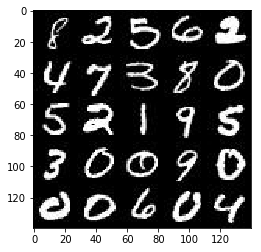

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

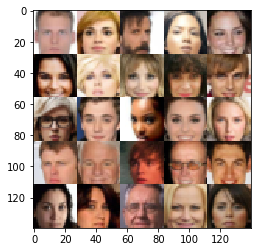

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1


/home/work/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32,(None,image_width,image_height,image_channels),name='input_real')
    z_data = tf.placeholder(tf.float32,(None,z_dim),name='input_z')
    l_rate = tf.placeholder(tf.float32,name='learning_rate')
    return real_inputs, z_data, l_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.01
        m1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='SAME', kernel_initializer = tf.random_normal_initializer(stddev=0.01))
        m1 = tf.maximum(alpha * m1, m1)

        
        m2 = tf.layers.conv2d(m1, 128, 5, strides=2, padding='SAME', kernel_initializer = tf.random_normal_initializer(stddev=0.01))
        m2 = tf.layers.batch_normalization(m2, training=True)
        m2 = tf.maximum(alpha * m2, m2)

        
        m3 = tf.layers.conv2d(m2, 256, 5, strides=2, padding='SAME', kernel_initializer = tf.random_normal_initializer(stddev=0.01))
        m3 = tf.layers.batch_normalization(m3, training=True)
        m3 = tf.maximum(alpha * m3, m3)

        
        flat = tf.reshape(m3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1, kernel_initializer=tf.random_normal_initializer(stddev=0.01))
        output = tf.sigmoid(logits)
        

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse=not is_train):
        alpha = 0.01
        m1 = tf.layers.dense(z,7*7*128)
        m1 = tf.reshape(m1,(-1,7,7,128))
        m1 = tf.layers.batch_normalization(m1,training=is_train)
        m1 = tf.maximum(alpha * m1,m1)
        
        
        m2 = tf.layers.conv2d_transpose(m1,64,4,strides=2,padding='same')
        m2 = tf.layers.batch_normalization(m2,training=is_train)
        m2 = tf.maximum(alpha * m2,m2)
        
        
        logits = tf.layers.conv2d_transpose(m2,out_channel_dim,4,strides=2,padding='same')
        out_channel_dim = tf.tanh(logits)
        
    return out_channel_dim


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    gm = generator(input_z, out_channel_dim, is_train=True)
    dm, ds = discriminator(input_real)
    dt, dh = discriminator(gm, reuse=True)

    dr = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=ds, labels=tf.ones_like(dm)*0.9))
    df = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dh, labels=tf.zeros_like(dt)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dh, labels=tf.ones_like(dt)))

    d_loss = dr + df
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    tv = tf.trainable_variables()
    disc = [var for var in tv if var.name.startswith('discriminator')]
    gene = [var for var in tv if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        discriminator_train = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=disc)
        generator_train = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gene)

    return discriminator_train, generator_train


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, width, height, depth = data_shape
    input_real, input_z, l_rate = model_inputs(width, height, depth, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, depth)
    discriminator_train, generator_train = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    losses = []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(discriminator_train, feed_dict={input_real: batch_images, input_z: batch_z, l_rate: learning_rate})
                _ = sess.run(generator_train, feed_dict={input_real: batch_images, input_z: batch_z, l_rate: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z, l_rate: learning_rate})
                    train_loss_g = g_loss.eval({input_real: batch_images, input_z: batch_z, l_rate: learning_rate})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count), "Discriminator Loss: {:.4f}...".format(train_loss_d), "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % 100 == 0:
                    show_generator_output(sess, 10, input_z, depth, data_image_mode)
 
    return losses           

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.9925... Generator Loss: 0.0931
Epoch 1/2... Discriminator Loss: 1.0812... Generator Loss: 0.8946
Epoch 1/2... Discriminator Loss: 1.0631... Generator Loss: 0.8595
Epoch 1/2... Discriminator Loss: 0.9836... Generator Loss: 1.8727
Epoch 1/2... Discriminator Loss: 1.1146... Generator Loss: 1.0866
Epoch 1/2... Discriminator Loss: 1.3772... Generator Loss: 2.3907
Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 0.6486
Epoch 1/2... Discriminator Loss: 1.0796... Generator Loss: 1.9309
Epoch 1/2... Discriminator Loss: 1.1927... Generator Loss: 1.4668
Epoch 1/2... Discriminator Loss: 1.1505... Generator Loss: 0.6560


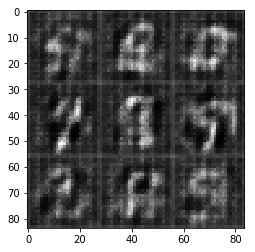

Epoch 1/2... Discriminator Loss: 1.0387... Generator Loss: 0.8195
Epoch 1/2... Discriminator Loss: 0.8740... Generator Loss: 1.5671
Epoch 1/2... Discriminator Loss: 0.9666... Generator Loss: 2.1697
Epoch 1/2... Discriminator Loss: 0.8090... Generator Loss: 1.5658
Epoch 1/2... Discriminator Loss: 0.8691... Generator Loss: 1.8602
Epoch 1/2... Discriminator Loss: 1.0343... Generator Loss: 3.2241
Epoch 1/2... Discriminator Loss: 0.9604... Generator Loss: 2.3895
Epoch 1/2... Discriminator Loss: 0.8494... Generator Loss: 1.7608
Epoch 1/2... Discriminator Loss: 1.0335... Generator Loss: 0.8225
Epoch 1/2... Discriminator Loss: 1.1085... Generator Loss: 0.7370


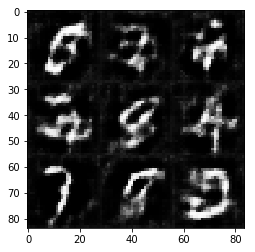

Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 2.0175
Epoch 1/2... Discriminator Loss: 1.1067... Generator Loss: 0.7617
Epoch 1/2... Discriminator Loss: 1.0528... Generator Loss: 0.8422
Epoch 1/2... Discriminator Loss: 0.9139... Generator Loss: 1.1350
Epoch 1/2... Discriminator Loss: 1.5172... Generator Loss: 0.4996
Epoch 1/2... Discriminator Loss: 1.0308... Generator Loss: 0.8999
Epoch 1/2... Discriminator Loss: 0.8761... Generator Loss: 2.2716
Epoch 1/2... Discriminator Loss: 0.7299... Generator Loss: 1.5953
Epoch 1/2... Discriminator Loss: 0.8352... Generator Loss: 1.4799
Epoch 1/2... Discriminator Loss: 0.8647... Generator Loss: 1.1495


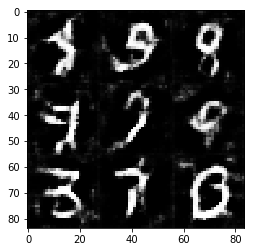

Epoch 1/2... Discriminator Loss: 1.3831... Generator Loss: 0.6273
Epoch 1/2... Discriminator Loss: 0.7891... Generator Loss: 1.5037
Epoch 1/2... Discriminator Loss: 1.0532... Generator Loss: 0.8469
Epoch 1/2... Discriminator Loss: 0.7926... Generator Loss: 2.0678
Epoch 1/2... Discriminator Loss: 0.7196... Generator Loss: 1.5120
Epoch 1/2... Discriminator Loss: 1.3609... Generator Loss: 0.5417
Epoch 1/2... Discriminator Loss: 0.8315... Generator Loss: 1.4382
Epoch 1/2... Discriminator Loss: 1.5761... Generator Loss: 0.4640
Epoch 1/2... Discriminator Loss: 0.8447... Generator Loss: 1.1470
Epoch 1/2... Discriminator Loss: 0.8405... Generator Loss: 1.3936


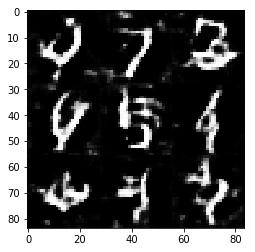

Epoch 1/2... Discriminator Loss: 1.0351... Generator Loss: 0.8449
Epoch 1/2... Discriminator Loss: 0.8182... Generator Loss: 2.8357
Epoch 1/2... Discriminator Loss: 1.0522... Generator Loss: 0.8775
Epoch 1/2... Discriminator Loss: 1.1628... Generator Loss: 0.7039
Epoch 1/2... Discriminator Loss: 1.4912... Generator Loss: 0.5232
Epoch 1/2... Discriminator Loss: 1.1677... Generator Loss: 1.8071
Epoch 1/2... Discriminator Loss: 1.1416... Generator Loss: 0.7372
Epoch 1/2... Discriminator Loss: 0.6680... Generator Loss: 1.6977
Epoch 1/2... Discriminator Loss: 1.3464... Generator Loss: 0.5706
Epoch 1/2... Discriminator Loss: 1.4800... Generator Loss: 0.5188


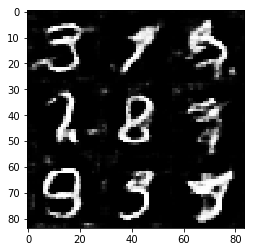

Epoch 1/2... Discriminator Loss: 0.7934... Generator Loss: 1.3033
Epoch 1/2... Discriminator Loss: 1.7220... Generator Loss: 0.4192
Epoch 1/2... Discriminator Loss: 0.9805... Generator Loss: 1.0154
Epoch 1/2... Discriminator Loss: 1.0309... Generator Loss: 0.9350
Epoch 1/2... Discriminator Loss: 0.8451... Generator Loss: 1.9198
Epoch 1/2... Discriminator Loss: 0.8905... Generator Loss: 1.1333
Epoch 1/2... Discriminator Loss: 0.9234... Generator Loss: 1.1354
Epoch 1/2... Discriminator Loss: 0.9350... Generator Loss: 1.0862
Epoch 1/2... Discriminator Loss: 0.8341... Generator Loss: 1.4195
Epoch 1/2... Discriminator Loss: 1.5913... Generator Loss: 0.5332


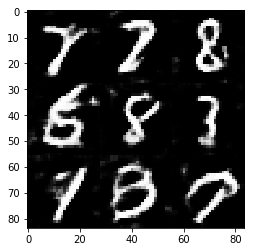

Epoch 1/2... Discriminator Loss: 0.8037... Generator Loss: 1.7710
Epoch 1/2... Discriminator Loss: 1.0022... Generator Loss: 0.9274
Epoch 1/2... Discriminator Loss: 0.8444... Generator Loss: 1.1692
Epoch 1/2... Discriminator Loss: 0.7182... Generator Loss: 1.5084
Epoch 1/2... Discriminator Loss: 1.6568... Generator Loss: 0.4927
Epoch 1/2... Discriminator Loss: 0.7574... Generator Loss: 1.4449
Epoch 1/2... Discriminator Loss: 0.8857... Generator Loss: 1.1642
Epoch 1/2... Discriminator Loss: 0.7781... Generator Loss: 1.4955
Epoch 1/2... Discriminator Loss: 1.1112... Generator Loss: 0.7823
Epoch 1/2... Discriminator Loss: 1.0355... Generator Loss: 0.9847


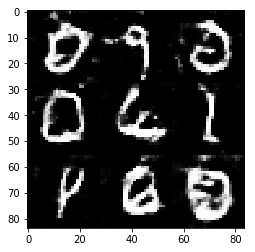

Epoch 1/2... Discriminator Loss: 0.6571... Generator Loss: 1.7917
Epoch 1/2... Discriminator Loss: 0.7358... Generator Loss: 1.4727
Epoch 1/2... Discriminator Loss: 1.0774... Generator Loss: 1.0498
Epoch 1/2... Discriminator Loss: 0.8390... Generator Loss: 1.9580
Epoch 1/2... Discriminator Loss: 1.0784... Generator Loss: 0.8075
Epoch 1/2... Discriminator Loss: 1.1502... Generator Loss: 0.7503
Epoch 1/2... Discriminator Loss: 0.6966... Generator Loss: 1.6432
Epoch 1/2... Discriminator Loss: 0.7172... Generator Loss: 1.6768
Epoch 1/2... Discriminator Loss: 1.4083... Generator Loss: 0.5808
Epoch 1/2... Discriminator Loss: 1.1791... Generator Loss: 0.8071


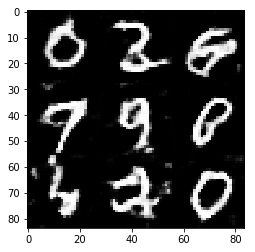

Epoch 1/2... Discriminator Loss: 1.4779... Generator Loss: 0.5516
Epoch 1/2... Discriminator Loss: 0.6119... Generator Loss: 2.2507
Epoch 1/2... Discriminator Loss: 1.0921... Generator Loss: 0.9202
Epoch 1/2... Discriminator Loss: 0.9742... Generator Loss: 0.9997
Epoch 1/2... Discriminator Loss: 1.1581... Generator Loss: 0.7423
Epoch 1/2... Discriminator Loss: 0.8304... Generator Loss: 1.1774
Epoch 1/2... Discriminator Loss: 1.6045... Generator Loss: 0.5030
Epoch 1/2... Discriminator Loss: 0.9289... Generator Loss: 2.0810
Epoch 1/2... Discriminator Loss: 1.3572... Generator Loss: 0.6178
Epoch 1/2... Discriminator Loss: 0.7743... Generator Loss: 1.7962


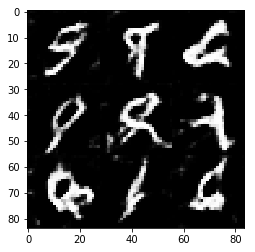

Epoch 1/2... Discriminator Loss: 0.7137... Generator Loss: 1.9139
Epoch 1/2... Discriminator Loss: 1.2526... Generator Loss: 2.4851
Epoch 1/2... Discriminator Loss: 0.7097... Generator Loss: 1.9250
Epoch 1/2... Discriminator Loss: 0.8684... Generator Loss: 1.1937
Epoch 1/2... Discriminator Loss: 0.7019... Generator Loss: 1.6537
Epoch 1/2... Discriminator Loss: 1.2717... Generator Loss: 0.7391
Epoch 1/2... Discriminator Loss: 1.0980... Generator Loss: 0.8682
Epoch 1/2... Discriminator Loss: 1.1330... Generator Loss: 0.8243
Epoch 1/2... Discriminator Loss: 1.2945... Generator Loss: 0.7124
Epoch 1/2... Discriminator Loss: 1.1538... Generator Loss: 0.7833


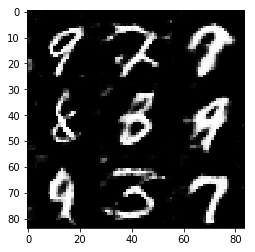

Epoch 1/2... Discriminator Loss: 2.2039... Generator Loss: 0.3070
Epoch 1/2... Discriminator Loss: 0.7855... Generator Loss: 1.6675
Epoch 1/2... Discriminator Loss: 1.3213... Generator Loss: 0.6078
Epoch 1/2... Discriminator Loss: 1.6421... Generator Loss: 0.5512
Epoch 1/2... Discriminator Loss: 0.8272... Generator Loss: 1.3086
Epoch 1/2... Discriminator Loss: 1.7973... Generator Loss: 0.4086
Epoch 1/2... Discriminator Loss: 1.9075... Generator Loss: 0.3623
Epoch 1/2... Discriminator Loss: 1.4522... Generator Loss: 0.5975
Epoch 1/2... Discriminator Loss: 1.0677... Generator Loss: 0.8311
Epoch 1/2... Discriminator Loss: 1.0287... Generator Loss: 0.8917


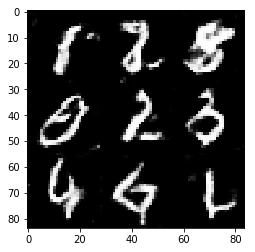

Epoch 1/2... Discriminator Loss: 0.6703... Generator Loss: 1.5139
Epoch 1/2... Discriminator Loss: 0.8005... Generator Loss: 1.2119
Epoch 1/2... Discriminator Loss: 0.9735... Generator Loss: 0.9702
Epoch 1/2... Discriminator Loss: 1.7772... Generator Loss: 0.4595
Epoch 1/2... Discriminator Loss: 0.7456... Generator Loss: 1.4570
Epoch 1/2... Discriminator Loss: 0.8054... Generator Loss: 1.7951
Epoch 1/2... Discriminator Loss: 0.8477... Generator Loss: 1.6151
Epoch 1/2... Discriminator Loss: 1.1318... Generator Loss: 0.8529
Epoch 1/2... Discriminator Loss: 0.8346... Generator Loss: 1.1714
Epoch 1/2... Discriminator Loss: 0.7161... Generator Loss: 1.5319


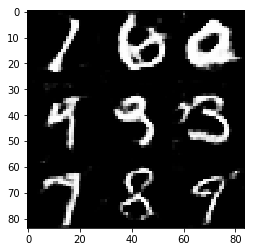

Epoch 2/2... Discriminator Loss: 0.6881... Generator Loss: 1.8367
Epoch 2/2... Discriminator Loss: 0.7687... Generator Loss: 1.7624
Epoch 2/2... Discriminator Loss: 0.7757... Generator Loss: 1.6429
Epoch 2/2... Discriminator Loss: 0.7049... Generator Loss: 1.5281
Epoch 2/2... Discriminator Loss: 1.5603... Generator Loss: 0.5325
Epoch 2/2... Discriminator Loss: 0.9026... Generator Loss: 1.3034
Epoch 2/2... Discriminator Loss: 3.0744... Generator Loss: 0.1466
Epoch 2/2... Discriminator Loss: 0.7376... Generator Loss: 1.3494
Epoch 2/2... Discriminator Loss: 1.2647... Generator Loss: 0.6989
Epoch 2/2... Discriminator Loss: 0.8244... Generator Loss: 1.1679


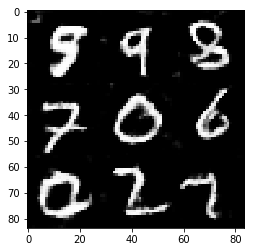

Epoch 2/2... Discriminator Loss: 0.7431... Generator Loss: 1.5348
Epoch 2/2... Discriminator Loss: 0.7497... Generator Loss: 1.7243
Epoch 2/2... Discriminator Loss: 0.8402... Generator Loss: 1.2733
Epoch 2/2... Discriminator Loss: 1.9537... Generator Loss: 0.3566
Epoch 2/2... Discriminator Loss: 0.7804... Generator Loss: 1.4125
Epoch 2/2... Discriminator Loss: 0.8137... Generator Loss: 1.2375
Epoch 2/2... Discriminator Loss: 0.8784... Generator Loss: 1.8899
Epoch 2/2... Discriminator Loss: 1.2372... Generator Loss: 0.8232
Epoch 2/2... Discriminator Loss: 1.0009... Generator Loss: 0.9242
Epoch 2/2... Discriminator Loss: 1.0558... Generator Loss: 0.8427


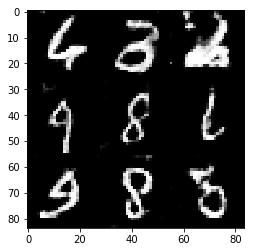

Epoch 2/2... Discriminator Loss: 0.7045... Generator Loss: 1.5148
Epoch 2/2... Discriminator Loss: 1.9739... Generator Loss: 0.3296
Epoch 2/2... Discriminator Loss: 1.6728... Generator Loss: 0.4902
Epoch 2/2... Discriminator Loss: 1.3959... Generator Loss: 3.4319
Epoch 2/2... Discriminator Loss: 0.8517... Generator Loss: 1.1880
Epoch 2/2... Discriminator Loss: 1.0363... Generator Loss: 0.9497
Epoch 2/2... Discriminator Loss: 0.6584... Generator Loss: 1.8690
Epoch 2/2... Discriminator Loss: 1.3156... Generator Loss: 0.6551
Epoch 2/2... Discriminator Loss: 0.7076... Generator Loss: 1.4436
Epoch 2/2... Discriminator Loss: 0.7002... Generator Loss: 1.6686


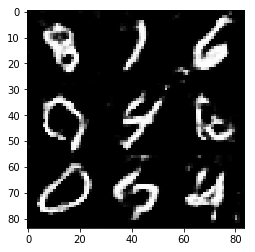

Epoch 2/2... Discriminator Loss: 1.4009... Generator Loss: 0.7003
Epoch 2/2... Discriminator Loss: 0.7003... Generator Loss: 1.7455
Epoch 2/2... Discriminator Loss: 1.6499... Generator Loss: 0.4548
Epoch 2/2... Discriminator Loss: 0.8055... Generator Loss: 1.5004
Epoch 2/2... Discriminator Loss: 0.7191... Generator Loss: 1.4653
Epoch 2/2... Discriminator Loss: 0.7959... Generator Loss: 1.3344
Epoch 2/2... Discriminator Loss: 0.8644... Generator Loss: 1.5714
Epoch 2/2... Discriminator Loss: 0.8088... Generator Loss: 1.3052
Epoch 2/2... Discriminator Loss: 1.3447... Generator Loss: 2.9398
Epoch 2/2... Discriminator Loss: 0.8578... Generator Loss: 1.7806


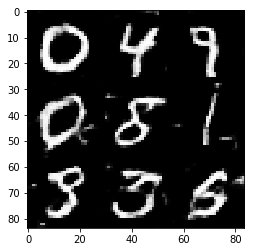

Epoch 2/2... Discriminator Loss: 0.7360... Generator Loss: 1.3660
Epoch 2/2... Discriminator Loss: 0.7103... Generator Loss: 1.6014
Epoch 2/2... Discriminator Loss: 1.3179... Generator Loss: 0.6494
Epoch 2/2... Discriminator Loss: 0.7998... Generator Loss: 1.3353
Epoch 2/2... Discriminator Loss: 1.4129... Generator Loss: 0.6596
Epoch 2/2... Discriminator Loss: 1.2759... Generator Loss: 0.7104
Epoch 2/2... Discriminator Loss: 2.0979... Generator Loss: 0.3382
Epoch 2/2... Discriminator Loss: 0.7409... Generator Loss: 1.8119
Epoch 2/2... Discriminator Loss: 0.7053... Generator Loss: 1.6739
Epoch 2/2... Discriminator Loss: 0.9687... Generator Loss: 1.0533


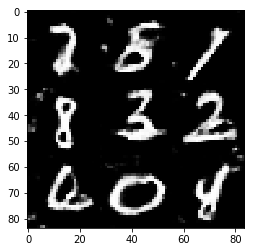

Epoch 2/2... Discriminator Loss: 0.7908... Generator Loss: 1.5389
Epoch 2/2... Discriminator Loss: 0.9174... Generator Loss: 1.0370
Epoch 2/2... Discriminator Loss: 0.8359... Generator Loss: 1.2394
Epoch 2/2... Discriminator Loss: 0.8490... Generator Loss: 1.2480
Epoch 2/2... Discriminator Loss: 0.6468... Generator Loss: 2.4157
Epoch 2/2... Discriminator Loss: 0.7587... Generator Loss: 1.3600
Epoch 2/2... Discriminator Loss: 0.7116... Generator Loss: 1.4546
Epoch 2/2... Discriminator Loss: 1.5318... Generator Loss: 0.5264
Epoch 2/2... Discriminator Loss: 1.0505... Generator Loss: 0.8791
Epoch 2/2... Discriminator Loss: 0.6325... Generator Loss: 2.2479


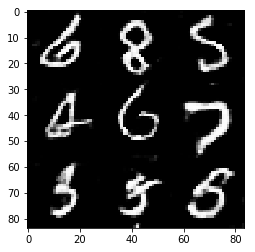

Epoch 2/2... Discriminator Loss: 0.7974... Generator Loss: 1.4044
Epoch 2/2... Discriminator Loss: 1.6395... Generator Loss: 0.4422
Epoch 2/2... Discriminator Loss: 2.2601... Generator Loss: 0.2575
Epoch 2/2... Discriminator Loss: 0.7192... Generator Loss: 1.4316
Epoch 2/2... Discriminator Loss: 0.9404... Generator Loss: 1.0225
Epoch 2/2... Discriminator Loss: 0.9772... Generator Loss: 1.0896
Epoch 2/2... Discriminator Loss: 1.3204... Generator Loss: 0.6645
Epoch 2/2... Discriminator Loss: 0.9220... Generator Loss: 1.0907
Epoch 2/2... Discriminator Loss: 1.2227... Generator Loss: 0.6592
Epoch 2/2... Discriminator Loss: 0.8077... Generator Loss: 1.3115


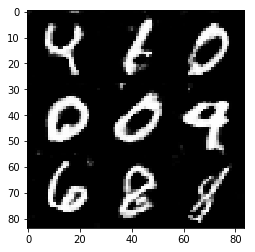

Epoch 2/2... Discriminator Loss: 1.4517... Generator Loss: 0.5667
Epoch 2/2... Discriminator Loss: 2.0483... Generator Loss: 0.3496
Epoch 2/2... Discriminator Loss: 0.7618... Generator Loss: 1.2928
Epoch 2/2... Discriminator Loss: 0.8203... Generator Loss: 1.1599
Epoch 2/2... Discriminator Loss: 0.8461... Generator Loss: 1.1632
Epoch 2/2... Discriminator Loss: 1.4044... Generator Loss: 0.5815
Epoch 2/2... Discriminator Loss: 0.9944... Generator Loss: 1.0486
Epoch 2/2... Discriminator Loss: 0.6960... Generator Loss: 1.6298
Epoch 2/2... Discriminator Loss: 0.7250... Generator Loss: 1.7315
Epoch 2/2... Discriminator Loss: 1.2112... Generator Loss: 0.7757


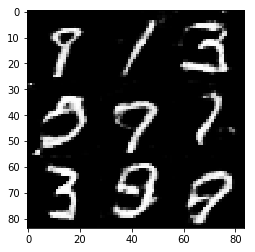

Epoch 2/2... Discriminator Loss: 0.7726... Generator Loss: 1.2598
Epoch 2/2... Discriminator Loss: 0.5877... Generator Loss: 1.8849
Epoch 2/2... Discriminator Loss: 1.0543... Generator Loss: 0.8682
Epoch 2/2... Discriminator Loss: 1.3025... Generator Loss: 0.6061
Epoch 2/2... Discriminator Loss: 1.7209... Generator Loss: 0.4182
Epoch 2/2... Discriminator Loss: 0.7585... Generator Loss: 1.4840
Epoch 2/2... Discriminator Loss: 1.6079... Generator Loss: 0.4867
Epoch 2/2... Discriminator Loss: 0.9130... Generator Loss: 1.3054
Epoch 2/2... Discriminator Loss: 0.9747... Generator Loss: 0.9836
Epoch 2/2... Discriminator Loss: 0.9747... Generator Loss: 1.1138


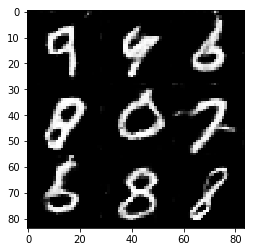

Epoch 2/2... Discriminator Loss: 0.8634... Generator Loss: 1.1081
Epoch 2/2... Discriminator Loss: 0.9483... Generator Loss: 1.0214
Epoch 2/2... Discriminator Loss: 0.6455... Generator Loss: 1.9183
Epoch 2/2... Discriminator Loss: 1.0560... Generator Loss: 0.8212
Epoch 2/2... Discriminator Loss: 0.7679... Generator Loss: 1.3389
Epoch 2/2... Discriminator Loss: 0.7069... Generator Loss: 1.4359
Epoch 2/2... Discriminator Loss: 0.7367... Generator Loss: 1.3612
Epoch 2/2... Discriminator Loss: 0.6465... Generator Loss: 1.7540
Epoch 2/2... Discriminator Loss: 1.0186... Generator Loss: 0.9233
Epoch 2/2... Discriminator Loss: 0.7103... Generator Loss: 1.6376


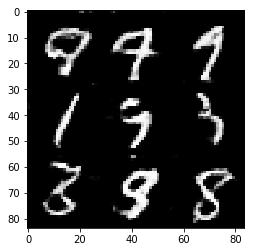

Epoch 2/2... Discriminator Loss: 0.9237... Generator Loss: 1.0776
Epoch 2/2... Discriminator Loss: 1.0893... Generator Loss: 0.8257
Epoch 2/2... Discriminator Loss: 0.8902... Generator Loss: 1.1028
Epoch 2/2... Discriminator Loss: 1.2877... Generator Loss: 0.6912
Epoch 2/2... Discriminator Loss: 0.7800... Generator Loss: 1.6753
Epoch 2/2... Discriminator Loss: 1.3303... Generator Loss: 0.6787
Epoch 2/2... Discriminator Loss: 1.9658... Generator Loss: 0.4338
Epoch 2/2... Discriminator Loss: 1.1631... Generator Loss: 0.8793
Epoch 2/2... Discriminator Loss: 0.6036... Generator Loss: 2.3249
Epoch 2/2... Discriminator Loss: 1.4646... Generator Loss: 0.6388


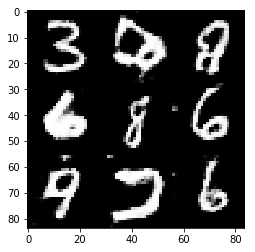

Epoch 2/2... Discriminator Loss: 0.7162... Generator Loss: 1.3724
Epoch 2/2... Discriminator Loss: 0.7019... Generator Loss: 1.3811
Epoch 2/2... Discriminator Loss: 1.1263... Generator Loss: 0.7992
Epoch 2/2... Discriminator Loss: 2.2036... Generator Loss: 0.2969
Epoch 2/2... Discriminator Loss: 1.2928... Generator Loss: 0.6941
Epoch 2/2... Discriminator Loss: 0.7917... Generator Loss: 3.2113
Epoch 2/2... Discriminator Loss: 1.6526... Generator Loss: 4.6188
Epoch 2/2... Discriminator Loss: 1.5551... Generator Loss: 0.5302
Epoch 2/2... Discriminator Loss: 0.7464... Generator Loss: 1.3607
Epoch 2/2... Discriminator Loss: 0.8396... Generator Loss: 1.1814


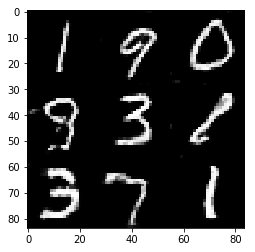

In [12]:
batch_size = 50
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.5181... Generator Loss: 2.1520
Epoch 1/1... Discriminator Loss: 1.1934... Generator Loss: 1.3678
Epoch 1/1... Discriminator Loss: 1.3187... Generator Loss: 0.6232
Epoch 1/1... Discriminator Loss: 1.0312... Generator Loss: 1.0083
Epoch 1/1... Discriminator Loss: 0.9769... Generator Loss: 1.4651
Epoch 1/1... Discriminator Loss: 1.1262... Generator Loss: 1.0505
Epoch 1/1... Discriminator Loss: 0.9776... Generator Loss: 1.4503
Epoch 1/1... Discriminator Loss: 2.1984... Generator Loss: 0.2116
Epoch 1/1... Discriminator Loss: 1.6751... Generator Loss: 0.4293
Epoch 1/1... Discriminator Loss: 1.2014... Generator Loss: 1.2294


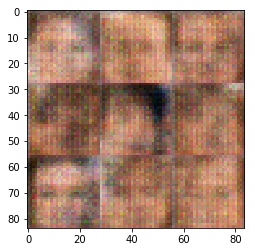

Epoch 1/1... Discriminator Loss: 1.2196... Generator Loss: 0.7963
Epoch 1/1... Discriminator Loss: 1.0767... Generator Loss: 0.9686
Epoch 1/1... Discriminator Loss: 2.1105... Generator Loss: 0.2078
Epoch 1/1... Discriminator Loss: 1.1233... Generator Loss: 0.7437
Epoch 1/1... Discriminator Loss: 1.2924... Generator Loss: 0.7370
Epoch 1/1... Discriminator Loss: 1.1004... Generator Loss: 0.9055
Epoch 1/1... Discriminator Loss: 1.3550... Generator Loss: 1.3007
Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 0.5492
Epoch 1/1... Discriminator Loss: 1.3095... Generator Loss: 0.7851
Epoch 1/1... Discriminator Loss: 1.3370... Generator Loss: 0.9915


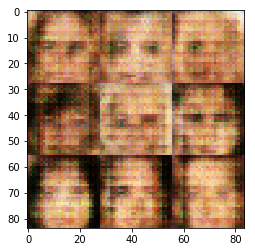

Epoch 1/1... Discriminator Loss: 0.9876... Generator Loss: 0.9639
Epoch 1/1... Discriminator Loss: 1.4809... Generator Loss: 1.4268
Epoch 1/1... Discriminator Loss: 1.3981... Generator Loss: 0.8221
Epoch 1/1... Discriminator Loss: 1.2638... Generator Loss: 0.8161
Epoch 1/1... Discriminator Loss: 1.1860... Generator Loss: 0.7785
Epoch 1/1... Discriminator Loss: 1.3022... Generator Loss: 1.7321
Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.9945
Epoch 1/1... Discriminator Loss: 2.1282... Generator Loss: 2.5018
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.5814
Epoch 1/1... Discriminator Loss: 1.8464... Generator Loss: 0.3109


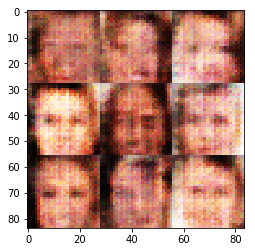

Epoch 1/1... Discriminator Loss: 1.2655... Generator Loss: 0.7121
Epoch 1/1... Discriminator Loss: 1.5235... Generator Loss: 0.4139
Epoch 1/1... Discriminator Loss: 1.4296... Generator Loss: 0.5143
Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 1.0496
Epoch 1/1... Discriminator Loss: 1.5917... Generator Loss: 0.4181
Epoch 1/1... Discriminator Loss: 1.2310... Generator Loss: 0.8140
Epoch 1/1... Discriminator Loss: 1.1586... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.1688... Generator Loss: 0.8762
Epoch 1/1... Discriminator Loss: 1.2207... Generator Loss: 1.0735
Epoch 1/1... Discriminator Loss: 1.1973... Generator Loss: 0.9127


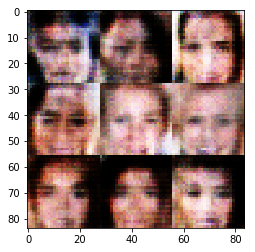

Epoch 1/1... Discriminator Loss: 1.1155... Generator Loss: 0.7785
Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 1.3488
Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.6590
Epoch 1/1... Discriminator Loss: 1.1595... Generator Loss: 0.7639
Epoch 1/1... Discriminator Loss: 1.1869... Generator Loss: 0.9020
Epoch 1/1... Discriminator Loss: 1.1762... Generator Loss: 0.7856
Epoch 1/1... Discriminator Loss: 1.3518... Generator Loss: 0.7930
Epoch 1/1... Discriminator Loss: 1.3086... Generator Loss: 1.2391
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.6885
Epoch 1/1... Discriminator Loss: 1.5793... Generator Loss: 0.3992


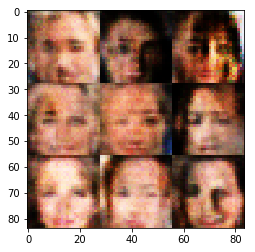

Epoch 1/1... Discriminator Loss: 1.2392... Generator Loss: 0.7914
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 0.7444
Epoch 1/1... Discriminator Loss: 0.9813... Generator Loss: 0.8666
Epoch 1/1... Discriminator Loss: 1.1844... Generator Loss: 0.8140
Epoch 1/1... Discriminator Loss: 1.3080... Generator Loss: 0.9049
Epoch 1/1... Discriminator Loss: 1.4644... Generator Loss: 1.3454
Epoch 1/1... Discriminator Loss: 1.5898... Generator Loss: 0.4126
Epoch 1/1... Discriminator Loss: 1.0959... Generator Loss: 1.1847
Epoch 1/1... Discriminator Loss: 1.9734... Generator Loss: 0.2520
Epoch 1/1... Discriminator Loss: 1.0780... Generator Loss: 1.2559


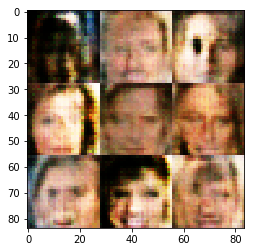

Epoch 1/1... Discriminator Loss: 1.2387... Generator Loss: 0.8466
Epoch 1/1... Discriminator Loss: 1.1723... Generator Loss: 0.8901
Epoch 1/1... Discriminator Loss: 1.1923... Generator Loss: 1.1860
Epoch 1/1... Discriminator Loss: 1.4568... Generator Loss: 1.1827
Epoch 1/1... Discriminator Loss: 1.2891... Generator Loss: 1.0259
Epoch 1/1... Discriminator Loss: 1.1528... Generator Loss: 0.8012
Epoch 1/1... Discriminator Loss: 1.5708... Generator Loss: 1.7522
Epoch 1/1... Discriminator Loss: 1.4607... Generator Loss: 0.4419
Epoch 1/1... Discriminator Loss: 1.2026... Generator Loss: 1.2878
Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 1.3707


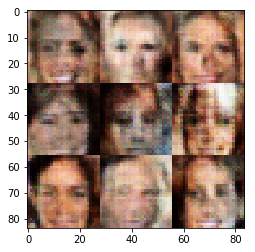

Epoch 1/1... Discriminator Loss: 1.2322... Generator Loss: 0.7956
Epoch 1/1... Discriminator Loss: 1.2568... Generator Loss: 0.6234
Epoch 1/1... Discriminator Loss: 1.1540... Generator Loss: 1.1015
Epoch 1/1... Discriminator Loss: 1.5176... Generator Loss: 0.4136
Epoch 1/1... Discriminator Loss: 1.0580... Generator Loss: 0.9752
Epoch 1/1... Discriminator Loss: 1.2327... Generator Loss: 1.2843
Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 1.8477
Epoch 1/1... Discriminator Loss: 0.9410... Generator Loss: 1.4316
Epoch 1/1... Discriminator Loss: 1.0987... Generator Loss: 1.1145
Epoch 1/1... Discriminator Loss: 1.0696... Generator Loss: 1.0579


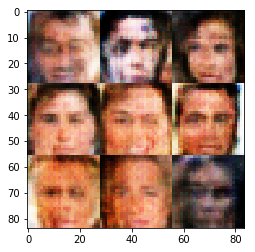

Epoch 1/1... Discriminator Loss: 1.2655... Generator Loss: 0.9069
Epoch 1/1... Discriminator Loss: 1.2679... Generator Loss: 0.8118
Epoch 1/1... Discriminator Loss: 1.2166... Generator Loss: 0.8261
Epoch 1/1... Discriminator Loss: 1.4845... Generator Loss: 0.4336
Epoch 1/1... Discriminator Loss: 1.0979... Generator Loss: 1.6062
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.9719
Epoch 1/1... Discriminator Loss: 1.3153... Generator Loss: 2.3861
Epoch 1/1... Discriminator Loss: 1.0523... Generator Loss: 1.4712
Epoch 1/1... Discriminator Loss: 1.4416... Generator Loss: 0.5192
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 0.7210


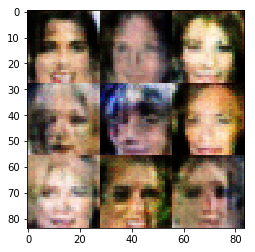

Epoch 1/1... Discriminator Loss: 1.3403... Generator Loss: 0.5231
Epoch 1/1... Discriminator Loss: 1.0394... Generator Loss: 1.1423
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.4656
Epoch 1/1... Discriminator Loss: 2.4169... Generator Loss: 0.1571
Epoch 1/1... Discriminator Loss: 1.1219... Generator Loss: 1.1276
Epoch 1/1... Discriminator Loss: 1.1615... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.1211... Generator Loss: 0.8928
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 1.4515... Generator Loss: 2.0391
Epoch 1/1... Discriminator Loss: 1.4701... Generator Loss: 0.5142


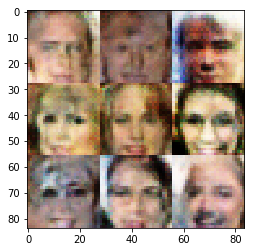

Epoch 1/1... Discriminator Loss: 1.1606... Generator Loss: 1.1130
Epoch 1/1... Discriminator Loss: 1.0773... Generator Loss: 1.0903
Epoch 1/1... Discriminator Loss: 1.0783... Generator Loss: 1.3093
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 0.9562... Generator Loss: 1.1594
Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.6377
Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 1.7127
Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 0.8884
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.5750
Epoch 1/1... Discriminator Loss: 1.1917... Generator Loss: 1.9198


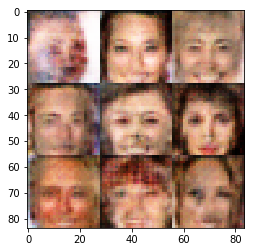

Epoch 1/1... Discriminator Loss: 1.0513... Generator Loss: 0.9065
Epoch 1/1... Discriminator Loss: 1.4708... Generator Loss: 2.2724
Epoch 1/1... Discriminator Loss: 1.9273... Generator Loss: 2.3382
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 3.1899
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 1.7426
Epoch 1/1... Discriminator Loss: 0.8313... Generator Loss: 1.2882
Epoch 1/1... Discriminator Loss: 0.8424... Generator Loss: 1.2599
Epoch 1/1... Discriminator Loss: 0.5342... Generator Loss: 1.9463
Epoch 1/1... Discriminator Loss: 1.1484... Generator Loss: 0.8216
Epoch 1/1... Discriminator Loss: 2.0395... Generator Loss: 0.2293


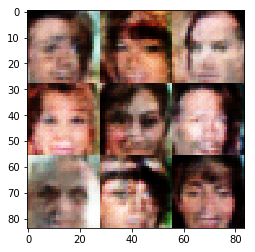

Epoch 1/1... Discriminator Loss: 1.0720... Generator Loss: 0.9112
Epoch 1/1... Discriminator Loss: 1.0305... Generator Loss: 1.3588
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 3.1770
Epoch 1/1... Discriminator Loss: 1.2422... Generator Loss: 0.6226
Epoch 1/1... Discriminator Loss: 1.2226... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 1.0226... Generator Loss: 0.9421
Epoch 1/1... Discriminator Loss: 1.1877... Generator Loss: 0.7213
Epoch 1/1... Discriminator Loss: 1.1444... Generator Loss: 0.8879
Epoch 1/1... Discriminator Loss: 0.9171... Generator Loss: 1.3053
Epoch 1/1... Discriminator Loss: 1.1040... Generator Loss: 0.8275


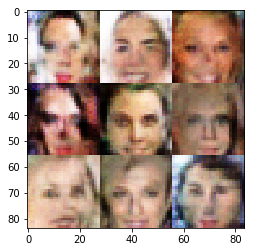

Epoch 1/1... Discriminator Loss: 0.9650... Generator Loss: 1.0043
Epoch 1/1... Discriminator Loss: 0.7810... Generator Loss: 1.3923
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 1.8661
Epoch 1/1... Discriminator Loss: 1.6298... Generator Loss: 0.3870
Epoch 1/1... Discriminator Loss: 1.1109... Generator Loss: 0.9684
Epoch 1/1... Discriminator Loss: 1.0240... Generator Loss: 0.7872
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 1.9728
Epoch 1/1... Discriminator Loss: 1.0701... Generator Loss: 0.9464
Epoch 1/1... Discriminator Loss: 1.0111... Generator Loss: 0.9307
Epoch 1/1... Discriminator Loss: 0.7061... Generator Loss: 1.8190


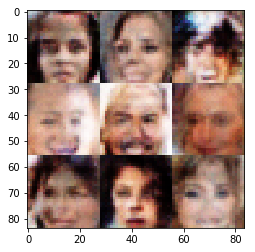

Epoch 1/1... Discriminator Loss: 1.7935... Generator Loss: 0.3549
Epoch 1/1... Discriminator Loss: 1.0040... Generator Loss: 1.0841
Epoch 1/1... Discriminator Loss: 1.1209... Generator Loss: 0.6824
Epoch 1/1... Discriminator Loss: 1.4318... Generator Loss: 0.5301
Epoch 1/1... Discriminator Loss: 1.5573... Generator Loss: 0.3956
Epoch 1/1... Discriminator Loss: 1.1064... Generator Loss: 1.0693
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 2.5401
Epoch 1/1... Discriminator Loss: 0.9713... Generator Loss: 1.0361
Epoch 1/1... Discriminator Loss: 1.2088... Generator Loss: 0.6907
Epoch 1/1... Discriminator Loss: 1.0383... Generator Loss: 1.4686


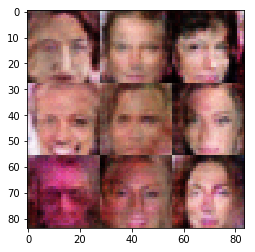

Epoch 1/1... Discriminator Loss: 0.9313... Generator Loss: 1.1330
Epoch 1/1... Discriminator Loss: 1.0712... Generator Loss: 0.8278
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 1.8336
Epoch 1/1... Discriminator Loss: 1.2497... Generator Loss: 0.6117
Epoch 1/1... Discriminator Loss: 1.4725... Generator Loss: 0.4287
Epoch 1/1... Discriminator Loss: 1.3464... Generator Loss: 0.5245
Epoch 1/1... Discriminator Loss: 1.0851... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 1.2619... Generator Loss: 0.5869
Epoch 1/1... Discriminator Loss: 0.8257... Generator Loss: 1.1247
Epoch 1/1... Discriminator Loss: 0.9759... Generator Loss: 1.0354


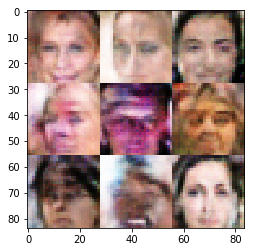

Epoch 1/1... Discriminator Loss: 0.8775... Generator Loss: 1.1071
Epoch 1/1... Discriminator Loss: 1.2092... Generator Loss: 0.6980
Epoch 1/1... Discriminator Loss: 1.5831... Generator Loss: 0.4043
Epoch 1/1... Discriminator Loss: 1.0656... Generator Loss: 1.5143
Epoch 1/1... Discriminator Loss: 1.2251... Generator Loss: 0.6366
Epoch 1/1... Discriminator Loss: 1.3088... Generator Loss: 0.5957
Epoch 1/1... Discriminator Loss: 0.9830... Generator Loss: 1.0130
Epoch 1/1... Discriminator Loss: 1.0995... Generator Loss: 0.7603
Epoch 1/1... Discriminator Loss: 1.2425... Generator Loss: 1.4593
Epoch 1/1... Discriminator Loss: 1.1170... Generator Loss: 0.8265


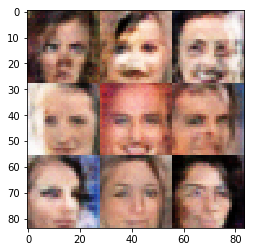

Epoch 1/1... Discriminator Loss: 1.7483... Generator Loss: 0.3317
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.5180
Epoch 1/1... Discriminator Loss: 1.1582... Generator Loss: 0.7487
Epoch 1/1... Discriminator Loss: 1.0284... Generator Loss: 1.7632
Epoch 1/1... Discriminator Loss: 1.0197... Generator Loss: 1.7952
Epoch 1/1... Discriminator Loss: 1.1830... Generator Loss: 0.7282
Epoch 1/1... Discriminator Loss: 1.0494... Generator Loss: 0.9555
Epoch 1/1... Discriminator Loss: 1.1379... Generator Loss: 0.7390
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.5892
Epoch 1/1... Discriminator Loss: 2.1014... Generator Loss: 0.2351


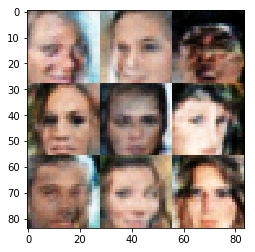

Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 0.5524
Epoch 1/1... Discriminator Loss: 0.9720... Generator Loss: 1.4550
Epoch 1/1... Discriminator Loss: 1.0158... Generator Loss: 1.1925
Epoch 1/1... Discriminator Loss: 1.4575... Generator Loss: 1.8880
Epoch 1/1... Discriminator Loss: 1.0579... Generator Loss: 1.4558
Epoch 1/1... Discriminator Loss: 1.1333... Generator Loss: 0.7745
Epoch 1/1... Discriminator Loss: 0.9452... Generator Loss: 1.3073
Epoch 1/1... Discriminator Loss: 0.7967... Generator Loss: 1.3030
Epoch 1/1... Discriminator Loss: 0.7445... Generator Loss: 1.5765
Epoch 1/1... Discriminator Loss: 1.1777... Generator Loss: 1.4767


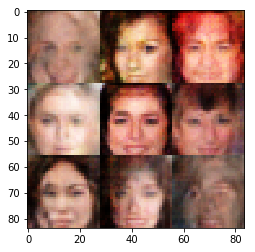

Epoch 1/1... Discriminator Loss: 1.1969... Generator Loss: 1.1505
Epoch 1/1... Discriminator Loss: 1.3375... Generator Loss: 0.5525
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.5555
Epoch 1/1... Discriminator Loss: 1.2016... Generator Loss: 1.5867
Epoch 1/1... Discriminator Loss: 2.1084... Generator Loss: 0.2597
Epoch 1/1... Discriminator Loss: 1.0094... Generator Loss: 1.0428
Epoch 1/1... Discriminator Loss: 1.1149... Generator Loss: 0.9065
Epoch 1/1... Discriminator Loss: 1.2602... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 1.8181... Generator Loss: 0.3533
Epoch 1/1... Discriminator Loss: 1.1109... Generator Loss: 0.7339


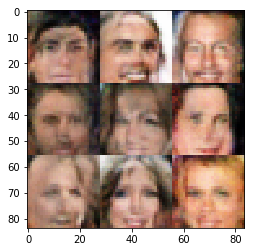

Epoch 1/1... Discriminator Loss: 1.0206... Generator Loss: 0.8686
Epoch 1/1... Discriminator Loss: 0.8681... Generator Loss: 1.3546
Epoch 1/1... Discriminator Loss: 0.9780... Generator Loss: 1.1316
Epoch 1/1... Discriminator Loss: 1.2253... Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.2235... Generator Loss: 1.9542
Epoch 1/1... Discriminator Loss: 1.1578... Generator Loss: 0.7291
Epoch 1/1... Discriminator Loss: 1.6142... Generator Loss: 0.3885
Epoch 1/1... Discriminator Loss: 1.1072... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 0.7341... Generator Loss: 1.4157
Epoch 1/1... Discriminator Loss: 1.0435... Generator Loss: 0.9449


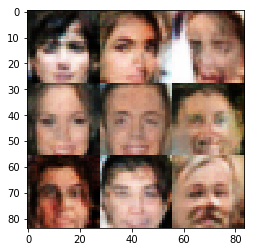

Epoch 1/1... Discriminator Loss: 0.9702... Generator Loss: 0.9299
Epoch 1/1... Discriminator Loss: 1.2878... Generator Loss: 0.5916
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.6895
Epoch 1/1... Discriminator Loss: 0.9222... Generator Loss: 1.2408
Epoch 1/1... Discriminator Loss: 1.1976... Generator Loss: 1.6003
Epoch 1/1... Discriminator Loss: 1.5122... Generator Loss: 0.4334
Epoch 1/1... Discriminator Loss: 1.0345... Generator Loss: 0.8166
Epoch 1/1... Discriminator Loss: 1.2666... Generator Loss: 0.7166
Epoch 1/1... Discriminator Loss: 1.0015... Generator Loss: 1.0223
Epoch 1/1... Discriminator Loss: 1.0043... Generator Loss: 1.7696


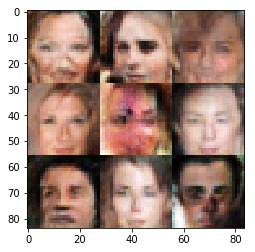

Epoch 1/1... Discriminator Loss: 0.8312... Generator Loss: 1.2928
Epoch 1/1... Discriminator Loss: 0.7935... Generator Loss: 1.5932
Epoch 1/1... Discriminator Loss: 2.0452... Generator Loss: 0.2672
Epoch 1/1... Discriminator Loss: 1.0836... Generator Loss: 0.7866
Epoch 1/1... Discriminator Loss: 0.9780... Generator Loss: 0.9296
Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 0.8012
Epoch 1/1... Discriminator Loss: 0.9408... Generator Loss: 1.2527
Epoch 1/1... Discriminator Loss: 0.9673... Generator Loss: 1.0767
Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 1.0486
Epoch 1/1... Discriminator Loss: 0.7482... Generator Loss: 1.4424


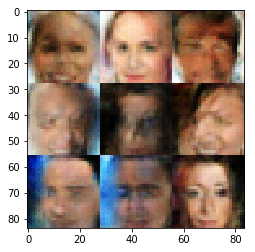

Epoch 1/1... Discriminator Loss: 2.1180... Generator Loss: 3.5476
Epoch 1/1... Discriminator Loss: 1.1314... Generator Loss: 1.0014
Epoch 1/1... Discriminator Loss: 1.0043... Generator Loss: 1.0709
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 0.6710
Epoch 1/1... Discriminator Loss: 0.9082... Generator Loss: 1.1233
Epoch 1/1... Discriminator Loss: 1.1028... Generator Loss: 0.9787
Epoch 1/1... Discriminator Loss: 1.3003... Generator Loss: 0.5749
Epoch 1/1... Discriminator Loss: 0.9993... Generator Loss: 1.0889
Epoch 1/1... Discriminator Loss: 1.0995... Generator Loss: 0.7338
Epoch 1/1... Discriminator Loss: 1.1311... Generator Loss: 0.7304


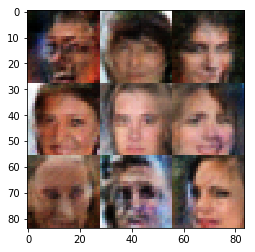

Epoch 1/1... Discriminator Loss: 1.1023... Generator Loss: 0.8343
Epoch 1/1... Discriminator Loss: 1.1473... Generator Loss: 0.7614
Epoch 1/1... Discriminator Loss: 1.0053... Generator Loss: 1.5587
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.5707
Epoch 1/1... Discriminator Loss: 0.9952... Generator Loss: 0.9991
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 0.7292
Epoch 1/1... Discriminator Loss: 1.8287... Generator Loss: 0.3361
Epoch 1/1... Discriminator Loss: 1.0127... Generator Loss: 1.1260
Epoch 1/1... Discriminator Loss: 1.2110... Generator Loss: 0.6606
Epoch 1/1... Discriminator Loss: 1.0451... Generator Loss: 0.9013


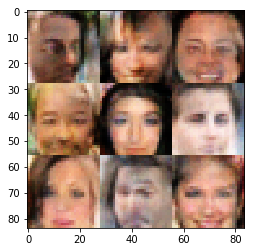

Epoch 1/1... Discriminator Loss: 1.2418... Generator Loss: 0.6200
Epoch 1/1... Discriminator Loss: 0.8366... Generator Loss: 2.4528
Epoch 1/1... Discriminator Loss: 1.4300... Generator Loss: 0.5199
Epoch 1/1... Discriminator Loss: 0.9195... Generator Loss: 1.7001
Epoch 1/1... Discriminator Loss: 1.6130... Generator Loss: 0.3804
Epoch 1/1... Discriminator Loss: 0.9138... Generator Loss: 1.1590
Epoch 1/1... Discriminator Loss: 1.0603... Generator Loss: 0.7974
Epoch 1/1... Discriminator Loss: 0.9156... Generator Loss: 1.1515
Epoch 1/1... Discriminator Loss: 1.0649... Generator Loss: 0.7813
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 1.6626


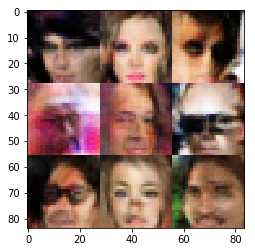

Epoch 1/1... Discriminator Loss: 1.1784... Generator Loss: 1.3825
Epoch 1/1... Discriminator Loss: 0.9238... Generator Loss: 1.2882
Epoch 1/1... Discriminator Loss: 1.0736... Generator Loss: 0.8076
Epoch 1/1... Discriminator Loss: 1.0208... Generator Loss: 0.8633
Epoch 1/1... Discriminator Loss: 1.1777... Generator Loss: 0.7749
Epoch 1/1... Discriminator Loss: 0.9729... Generator Loss: 0.9831
Epoch 1/1... Discriminator Loss: 1.5787... Generator Loss: 0.4398
Epoch 1/1... Discriminator Loss: 1.1502... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 0.9825... Generator Loss: 1.1598
Epoch 1/1... Discriminator Loss: 0.8995... Generator Loss: 1.1444


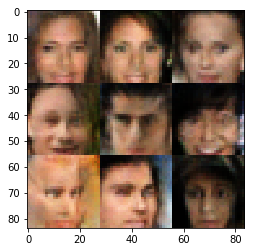

Epoch 1/1... Discriminator Loss: 0.6927... Generator Loss: 1.4500
Epoch 1/1... Discriminator Loss: 0.8947... Generator Loss: 1.2554
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 0.6605
Epoch 1/1... Discriminator Loss: 1.3155... Generator Loss: 0.7513
Epoch 1/1... Discriminator Loss: 2.2414... Generator Loss: 0.2304
Epoch 1/1... Discriminator Loss: 1.2112... Generator Loss: 0.6520
Epoch 1/1... Discriminator Loss: 1.2799... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 0.8322... Generator Loss: 2.1762
Epoch 1/1... Discriminator Loss: 1.0801... Generator Loss: 0.7753
Epoch 1/1... Discriminator Loss: 0.9089... Generator Loss: 1.1669


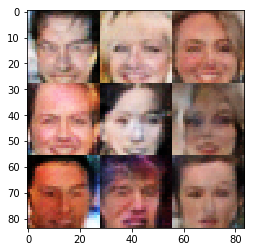

Epoch 1/1... Discriminator Loss: 0.8211... Generator Loss: 1.3845
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 0.5723
Epoch 1/1... Discriminator Loss: 1.3971... Generator Loss: 0.4993
Epoch 1/1... Discriminator Loss: 1.1208... Generator Loss: 1.2658
Epoch 1/1... Discriminator Loss: 1.0619... Generator Loss: 1.3217
Epoch 1/1... Discriminator Loss: 0.8813... Generator Loss: 1.2169
Epoch 1/1... Discriminator Loss: 1.6411... Generator Loss: 0.3637
Epoch 1/1... Discriminator Loss: 1.1533... Generator Loss: 1.9374
Epoch 1/1... Discriminator Loss: 0.9728... Generator Loss: 1.0522
Epoch 1/1... Discriminator Loss: 1.0467... Generator Loss: 0.8210


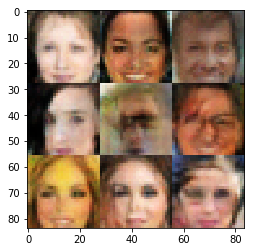

Epoch 1/1... Discriminator Loss: 1.2309... Generator Loss: 0.7042
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.5319
Epoch 1/1... Discriminator Loss: 0.8894... Generator Loss: 1.1990
Epoch 1/1... Discriminator Loss: 0.9334... Generator Loss: 1.2312
Epoch 1/1... Discriminator Loss: 0.9401... Generator Loss: 0.9904
Epoch 1/1... Discriminator Loss: 1.1183... Generator Loss: 0.8199
Epoch 1/1... Discriminator Loss: 1.0455... Generator Loss: 1.3893
Epoch 1/1... Discriminator Loss: 1.1562... Generator Loss: 1.8959
Epoch 1/1... Discriminator Loss: 0.9081... Generator Loss: 1.2500
Epoch 1/1... Discriminator Loss: 0.9266... Generator Loss: 0.9687


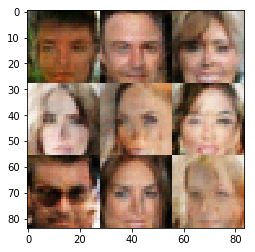

Epoch 1/1... Discriminator Loss: 1.1070... Generator Loss: 0.7417
Epoch 1/1... Discriminator Loss: 0.8613... Generator Loss: 1.2775
Epoch 1/1... Discriminator Loss: 0.8481... Generator Loss: 1.1646
Epoch 1/1... Discriminator Loss: 1.0133... Generator Loss: 1.8223
Epoch 1/1... Discriminator Loss: 1.3409... Generator Loss: 0.5454
Epoch 1/1... Discriminator Loss: 1.3057... Generator Loss: 0.6404
Epoch 1/1... Discriminator Loss: 0.9525... Generator Loss: 1.0258
Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 0.9490
Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.5875
Epoch 1/1... Discriminator Loss: 1.1473... Generator Loss: 0.6572


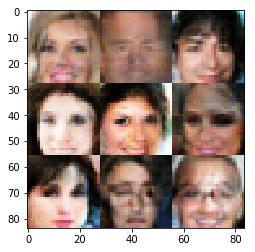

Epoch 1/1... Discriminator Loss: 1.1707... Generator Loss: 0.7804
Epoch 1/1... Discriminator Loss: 1.2221... Generator Loss: 0.6277
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 0.9787
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 0.9817
Epoch 1/1... Discriminator Loss: 0.9074... Generator Loss: 1.1062
Epoch 1/1... Discriminator Loss: 0.9608... Generator Loss: 1.1118
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.4844
Epoch 1/1... Discriminator Loss: 0.8599... Generator Loss: 1.0978
Epoch 1/1... Discriminator Loss: 1.0205... Generator Loss: 1.0855
Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.5148


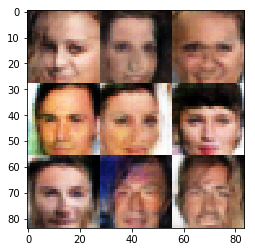

Epoch 1/1... Discriminator Loss: 1.1530... Generator Loss: 0.7334
Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.5022
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.7509
Epoch 1/1... Discriminator Loss: 1.1625... Generator Loss: 0.7119
Epoch 1/1... Discriminator Loss: 1.1707... Generator Loss: 1.3605
Epoch 1/1... Discriminator Loss: 0.9620... Generator Loss: 1.4173
Epoch 1/1... Discriminator Loss: 1.1311... Generator Loss: 0.7265
Epoch 1/1... Discriminator Loss: 1.1018... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 0.9335... Generator Loss: 0.9780
Epoch 1/1... Discriminator Loss: 0.7417... Generator Loss: 2.1900


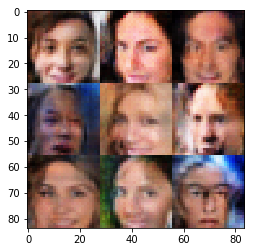

Epoch 1/1... Discriminator Loss: 0.9470... Generator Loss: 1.0332
Epoch 1/1... Discriminator Loss: 1.0453... Generator Loss: 1.1238
Epoch 1/1... Discriminator Loss: 1.0287... Generator Loss: 0.9642
Epoch 1/1... Discriminator Loss: 1.2141... Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.2309... Generator Loss: 0.6057
Epoch 1/1... Discriminator Loss: 0.8735... Generator Loss: 1.1741
Epoch 1/1... Discriminator Loss: 0.8265... Generator Loss: 1.1572
Epoch 1/1... Discriminator Loss: 1.0733... Generator Loss: 0.8947
Epoch 1/1... Discriminator Loss: 1.2806... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 1.0333... Generator Loss: 2.1500


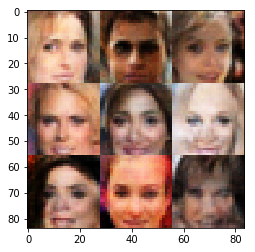

Epoch 1/1... Discriminator Loss: 0.9968... Generator Loss: 1.0303
Epoch 1/1... Discriminator Loss: 0.9510... Generator Loss: 1.3753
Epoch 1/1... Discriminator Loss: 0.9170... Generator Loss: 1.0093
Epoch 1/1... Discriminator Loss: 1.2068... Generator Loss: 0.6937
Epoch 1/1... Discriminator Loss: 0.9381... Generator Loss: 1.0039
Epoch 1/1... Discriminator Loss: 0.9544... Generator Loss: 1.0305
Epoch 1/1... Discriminator Loss: 0.8806... Generator Loss: 1.4055
Epoch 1/1... Discriminator Loss: 0.9740... Generator Loss: 1.0525
Epoch 1/1... Discriminator Loss: 1.2058... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 0.7631... Generator Loss: 1.8943


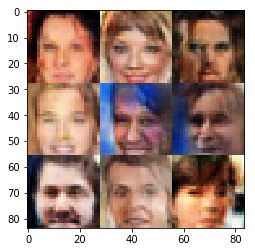

Epoch 1/1... Discriminator Loss: 1.2352... Generator Loss: 0.6830
Epoch 1/1... Discriminator Loss: 2.1617... Generator Loss: 0.2250
Epoch 1/1... Discriminator Loss: 0.9698... Generator Loss: 1.6345
Epoch 1/1... Discriminator Loss: 1.8415... Generator Loss: 0.3140
Epoch 1/1... Discriminator Loss: 1.1283... Generator Loss: 0.8179
Epoch 1/1... Discriminator Loss: 0.8559... Generator Loss: 1.3122
Epoch 1/1... Discriminator Loss: 0.7792... Generator Loss: 1.4020
Epoch 1/1... Discriminator Loss: 0.7218... Generator Loss: 1.6764
Epoch 1/1... Discriminator Loss: 1.4555... Generator Loss: 0.4949
Epoch 1/1... Discriminator Loss: 0.9401... Generator Loss: 2.1772


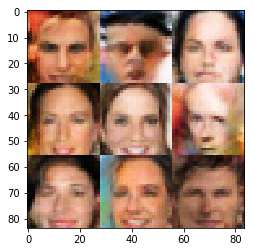

Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 2.5023
Epoch 1/1... Discriminator Loss: 0.9695... Generator Loss: 1.0318
Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.4643
Epoch 1/1... Discriminator Loss: 1.0784... Generator Loss: 0.7880
Epoch 1/1... Discriminator Loss: 0.9819... Generator Loss: 1.6206
Epoch 1/1... Discriminator Loss: 0.9604... Generator Loss: 0.9629
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 2.7356
Epoch 1/1... Discriminator Loss: 1.3347... Generator Loss: 0.5245
Epoch 1/1... Discriminator Loss: 0.9737... Generator Loss: 0.9059
Epoch 1/1... Discriminator Loss: 1.3218... Generator Loss: 0.5711


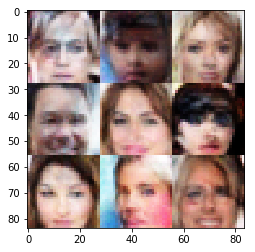

Epoch 1/1... Discriminator Loss: 1.0321... Generator Loss: 0.8656
Epoch 1/1... Discriminator Loss: 0.9084... Generator Loss: 0.9964
Epoch 1/1... Discriminator Loss: 0.9905... Generator Loss: 0.9166
Epoch 1/1... Discriminator Loss: 1.1397... Generator Loss: 0.7400
Epoch 1/1... Discriminator Loss: 0.9831... Generator Loss: 0.9609
Epoch 1/1... Discriminator Loss: 1.0956... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 1.7184... Generator Loss: 0.3491
Epoch 1/1... Discriminator Loss: 1.5290... Generator Loss: 0.4350
Epoch 1/1... Discriminator Loss: 1.2447... Generator Loss: 2.1194
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.5410


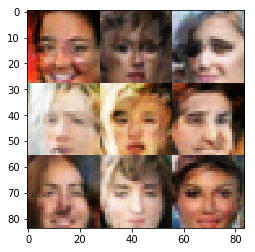

Epoch 1/1... Discriminator Loss: 0.8657... Generator Loss: 1.4447
Epoch 1/1... Discriminator Loss: 0.8709... Generator Loss: 1.1944
Epoch 1/1... Discriminator Loss: 1.0309... Generator Loss: 0.9297
Epoch 1/1... Discriminator Loss: 1.4452... Generator Loss: 1.9655
Epoch 1/1... Discriminator Loss: 1.1114... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.0034... Generator Loss: 0.8556
Epoch 1/1... Discriminator Loss: 0.9109... Generator Loss: 0.9916
Epoch 1/1... Discriminator Loss: 1.3171... Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 0.9615... Generator Loss: 0.9057
Epoch 1/1... Discriminator Loss: 1.2779... Generator Loss: 0.6700


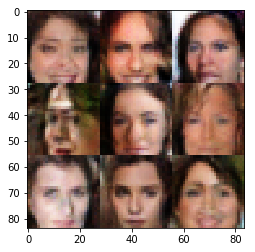

Epoch 1/1... Discriminator Loss: 1.0319... Generator Loss: 0.8754
Epoch 1/1... Discriminator Loss: 1.1920... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.3108... Generator Loss: 0.5546
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.7899
Epoch 1/1... Discriminator Loss: 1.3375... Generator Loss: 0.5755
Epoch 1/1... Discriminator Loss: 1.1450... Generator Loss: 0.7088
Epoch 1/1... Discriminator Loss: 1.2712... Generator Loss: 0.5788
Epoch 1/1... Discriminator Loss: 0.9252... Generator Loss: 1.0649
Epoch 1/1... Discriminator Loss: 0.9856... Generator Loss: 0.9559
Epoch 1/1... Discriminator Loss: 0.9264... Generator Loss: 1.7323


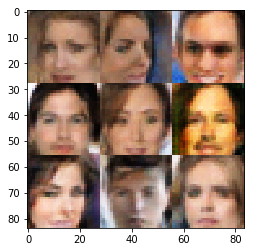

Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.5347
Epoch 1/1... Discriminator Loss: 1.5100... Generator Loss: 0.4454
Epoch 1/1... Discriminator Loss: 1.1158... Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.1235... Generator Loss: 2.2875
Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.5478


In [13]:
batch_size = 50
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.